In [104]:
import numpy as np
import pandas as pd
from pandasql import sqldf
import os
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline  
plt.style.use('ggplot')

In [4]:
df = pd.read_csv('../data/train-balanced-sarcasm.csv')

In [111]:
df.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...


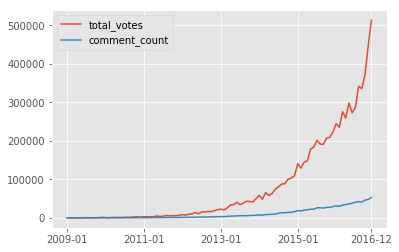

In [89]:
votes_over_time = """
                Select 
                    date,
                    SUM(abs(score)) AS total_votes
                FROM df
                GROUP BY date
                ORDER BY date
                """
comments_over_time = """
                Select 
                    date,
                    COUNT(*) AS comment_count
                FROM df
                GROUP BY date
                ORDER BY date
                """
sarcasm_over_time = """
                Select 
                    date,
                    COUNT(*) AS sarcasm_count
                FROM df
                WHERE label=1
                GROUP BY date
                ORDER BY date
                """

df_votetime = sqldf(votes_over_time, locals())
df_counttime = sqldf(comments_over_time, locals())
df_sarcasmtime = sqldf(sarcasm_over_time, locals())

fix, ax = plt.subplots(1,1)
ax.plot(df_votetime['date'], df_votetime['total_votes'])
ax.plot(df_counttime['comment_count'])
ax.legend(loc='upper left')

xrange = np.array([0,24,48,72, 95])
ax.set_xticks(xrange);

This shows the increase of reddit popularity over time, as well as the increase in proportion of votes to number of comments, which will need to be taken in mind when training our model

In [117]:
week_df = df[['label', 'created_utc']]
def to_weekday(string):
    return datetime.strptime(string, '%Y-%m-%d %H:%M:%S').weekday()
week_df['weekday'] = week_df['created_utc'].apply(lambda x: to_weekday(x))

/home/kyle/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [126]:
sarcasm_over_week = """
                Select 
                    weekday,
                    COUNT(*) AS sarcasm_count
                FROM week_df
                WHERE label=1
                GROUP BY weekday
                ORDER BY weekday
                """
comments_over_week = """
                Select 
                    weekday,
                    COUNT(*) AS comment_count
                FROM week_df
                GROUP BY weekday
                ORDER BY weekday
                """
df_sarcasm_week = sqldf(sarcasm_over_week, locals())
df_comment_week = sqldf(comments_over_week, locals())

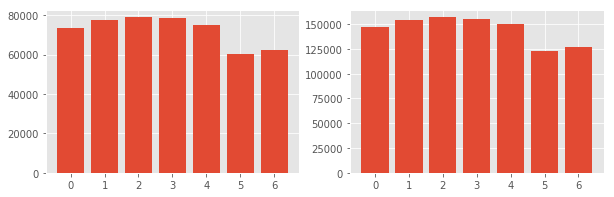

In [131]:
fig, axs = plt.subplots(1,2, figsize=(10,3))
axs[0].bar(df_sarcasm_week['weekday'], df_sarcasm_week['sarcasm_count'])
axs[1].bar(df_comment_week['weekday'], df_comment_week['comment_count']);

0 is monday - Seems that there are more comments during the week than on the weekend, but no signifigant change in sarcastic comments in that time frame that would argue that redditors are more or less sarcastic depending on the weekday

In [ ]:
duration = .5  # seconds
freq = 440  # Hz
os.system('play -nq -t alsa synth {} sine {}'.format(duration, freq))